In [1]:
import tkinter as tk
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from scipy import integrate

In [2]:
c = 3e8
kb = 1.3806e-23
h = 6.626e-34
T = 5772
a = 0.
b = 0.

In [3]:
f = lambda x: x**3/(np.exp(x)-1)

In [4]:
nu = np.linspace(0.1,30,100)
p = f(nu)

In [5]:
def GetLimits():
    
    l0 = float(lambda0.get())*1e-9
    l1 = float(lambda1.get())*1e-9

    # Actualizar los limites globalmente
    global a
    global b
    
    a = h*c/(kb*T*l1)
    b = h*c/(kb*T*l0)

In [6]:
def Plotting():
    
    ax.clear()
    
    GetLimits()
    print(a,b)
    
    ax.plot(nu,p,color='k')
    ax.axvline(x=a,ls='--',color='r')
    ax.axvline(x=b,ls='--',color='r')

    l = np.linspace(a,b,100)
    ax.fill_between(l,f(l),alpha=0.5)
    
    canvas.draw()

In [7]:
def GetIntegral():
    
    Num = integrate.quad(f,a,b)[0]
    Den = integrate.quad(f,0.001,np.inf)[0]
    
    I = np.round(Num/Den,6)
    
    Text1.delete("1.0","end")
    Text1.insert(tk.END, I)

6.2361780093201205 24.944712037280482


/tmp/ipykernel_12984/1851717489.py:1: RuntimeWarning: overflow encountered in exp
  f = lambda x: x**3/(np.exp(x)-1)


3.3259616049707317 6.2361780093201205
0.24944712037280484 3.3259616049707317


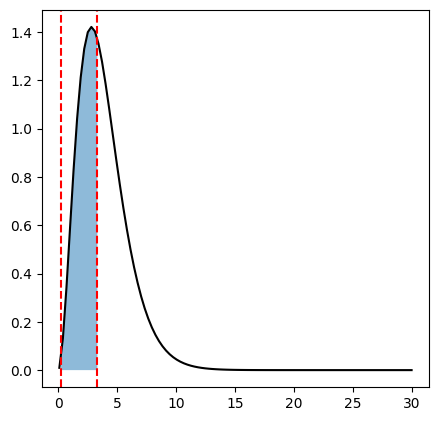

In [8]:
Window = tk.Tk()
Window.geometry("850x500")
Window.title('Potencia de cuerpo negro')

Frame1 = tk.Frame(Window)
Frame2 = tk.Frame(Window)

Frame1.config(relief='sunken', cursor='pirate',bd=5)
Frame2.config(relief='sunken', cursor='heart', bd=5)

Frame1.pack(side=tk.LEFT, expand=True,fill='both')
Frame2.pack(side=tk.RIGHT,expand=True,fill='both')

# Controls 
Label0 = tk.Label(Frame2,text='Longitud de Onda 1 [nm]',bg="White")
Label0.grid(row=0,column=0,padx=10, pady=10)

lambda0 = tk.StringVar()
lambda0.set("100")
Entry0 = tk.Entry(Frame2, textvariable=lambda0)
Entry0.grid(row=0,column=1, padx=10, pady=10)

Label1 = tk.Label(Frame2,text='Longitud de Onda 2 [nm]',bg="White")
Label1.grid(row=1,column=0,padx=10, pady=10)

lambda1 = tk.StringVar()
lambda1.set("400")
Entry1 = tk.Entry(Frame2, textvariable=lambda1)
Entry1.grid(row=1,column=1, padx=10, pady=10)

# Limits
Boton1 = tk.Button(Frame2, text='GetLimits', height=5, width=10, command=GetLimits)
Boton1.grid(row=2,column=0, columnspan=2 ,padx=10, pady=10)

# Plotting button
Boton2 = tk.Button(Frame2, text='Plot', height=5, width=10, command=Plotting)
Boton2.grid(row=3,column=0, columnspan=2 ,padx=10, pady=10)

# Integrator buttom
Boton3 = tk.Button(Frame2, text='Integrate', height=5, width=10, command=GetIntegral)
Boton3.grid(row=4,column=0,padx=10, pady=10)

Text1 = tk.Text(Frame2, height=2, width=10)
Text1.grid(row=4,column=1,padx=10, pady=10)

Boton4 = tk.Button(Frame2, text='Quit', command=Window.destroy)
Boton4.grid(row=5,column=0,columnspan=2, padx=10,pady=10)

fig = plt.figure(figsize=(5,5),dpi=100)
ax = fig.add_subplot(111)
canvas = FigureCanvasTkAgg(fig,master=Frame1)
canvas.get_tk_widget().grid(column=0,row=0)

Window.mainloop()